<a href="https://colab.research.google.com/github/shivangjay/Big_data_analysis_using_pyspark/blob/main/pdc_j_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

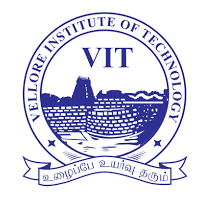
# 19BCE1754 Shubh Pachauri 
#19BCE1514 Shivang parnami
# PDC J Comp
# Dr HARINI S

In this project we are trying to use Py-Spark for data analysis and will attempt to use some ML to do some predictions on the data-set 
This data-set is about doge-coin
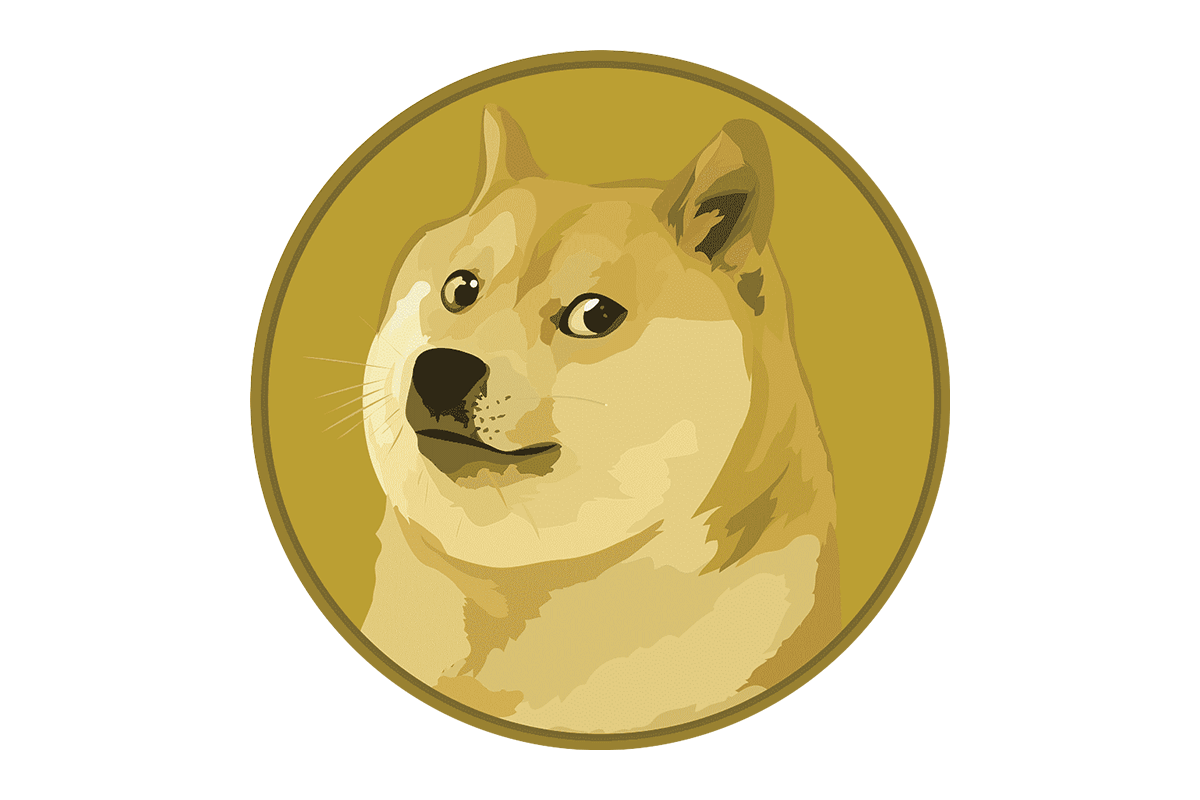
---
We will begin by:-
#EDA(Exploratory data analysis)
This will give a graphicasl idea about the dataset and will help us to understand the data set in detail:-

*   What is the dirction of the data 
*   What Trajectory does the data set follow
*   What is the corelation between the diffrent columns of the  dataset
*   Will try to Extrapolation some use full information from the data.

On the basis of the EDA we will then proceide with the ML prediction part




# **Loading Spark in Colab**

In [ ]:
!pwd

!wget https://dlcdn.apache.org/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz

/content
--2021-12-02 07:34:07--  https://dlcdn.apache.org/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 300965906 (287M) [application/x-gzip]
Saving to: ‘spark-3.2.0-bin-hadoop3.2.tgz’

spark-3.2.0-bin-had 100%[===================>] 287.02M   161MB/s    in 1.8s    

2021-12-02 07:34:08 (161 MB/s) - ‘spark-3.2.0-bin-hadoop3.2.tgz’ saved [300965906/300965906]



# **Unpacking Spark**

In [ ]:
!tar -xvzf spark-3.2.0-bin-hadoop3.2.tgz

# **Checking the content of Spark**

In [ ]:
!ls /content/spark-3.2.0-bin-hadoop3.2

bin   data	jars	    LICENSE   NOTICE  R		 RELEASE  yarn
conf  examples	kubernetes  licenses  python  README.md  sbin


# **Instaling findspark**

In [ ]:
!pip install findspark

# **Setting the SPARK_HOME**

In [ ]:
import os

os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"

# **Loading the FindSpark**

In [ ]:
import findspark
findspark.init()

# **Installing Pyspark**

In [ ]:
pip install pyspark


     |████████████████████████████████| 281.3 MB 40 kB/s 
     |████████████████████████████████| 198 kB 51.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=1700868822891282baaf2c28bae6a997ce2d1fd42fd5acb56a398cbccab05d2b
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


## Data Analysis

In [ ]:
import os
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 
%matplotlib inline

# **Loading the Important Py-Spark libraries**

In [ ]:
import pyspark
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit, desc, col, size, array_contains\
, isnan, udf, hour, array_min, array_max, countDistinct
from pyspark.sql.types import *
import pandas as pd


# **Starting the Spark session**

In [ ]:
spark = SparkSession.builder.appName('Review').getOrCreate()                                                                                           

# **Spark Version**

In [ ]:
spark

#**Loading the dataset**

In [ ]:

# spark = init_spark()
filename_data = '/content/doge.csv'
# Load the main data set into pyspark data frame 
df = spark.read.option('header','true').csv(filename_data)

Data frame type: <class 'pyspark.sql.dataframe.DataFrame'>


# **Printing the data type of the of the data set**

In [ ]:
print('Data frame type: ' + str(type(df)))

#**The data set**

In [ ]:
df.show()

+--------------+----------+-------+--------+--------+--------+--------+-----------+-----------+----+
|Unix Timestamp|      Date| Symbol|    Open|    High|     Low|   Close| Volume DOG|Volume EUSD| _c9|
+--------------+----------+-------+--------+--------+--------+--------+-----------+-----------+----+
|    1528675200|11-06-2018|DOGEUSD|0.003102|0.003185|0.003074|0.003161|  2061200.0|     6413.4|null|
|    1528502400|09-06-2018|DOGEUSD|0.003656|0.003700|0.003614|0.003627| 71438190.0|   261809.2|null|
|    1528416000|08-06-2018|DOGEUSD|0.003726|0.003726|0.003450|0.003656| 75571620.0|   276957.4|null|
|    1528329600|07-06-2018|DOGEUSD|0.003743|0.003856|0.003692|0.003726| 68292630.0|   257091.0|null|
|    1528243200|06-06-2018|DOGEUSD|0.003641|0.003801|0.003600|0.003743| 90495280.0|   335175.7|null|
|    1528156800|05-06-2018|DOGEUSD|0.003556|0.003743|0.003457|0.003641| 72819600.0|   261422.0|null|
|    1528070400|04-06-2018|DOGEUSD|0.003661|0.003745|0.003450|0.003556| 99906580.0|   35697

# **Getting to know the dataset**
# **EDA**⚡

In [ ]:
print('Data overview')
df.printSchema()
print('Columns overview')
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

Data overview
root
 |-- Unix Timestamp: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Symbol: string (nullable = true)
 |-- Open: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)
 |-- Close: string (nullable = true)
 |-- Volume DOG: string (nullable = true)
 |-- Volume EUSD: string (nullable = true)
 |-- _c9: string (nullable = true)

Columns overview


,Column Name,Data type
0,Unix Timestamp,string
1,Date,string
2,Symbol,string
3,Open,string
4,High,string
5,Low,string
6,Close,string
7,Volume DOG,string
8,Volume EUSD,string
9,_c9,string


In [ ]:
print(f'There are total {df.count()} row, Let print first 2 data rows:')
df.limit(2).toPandas()

There are total 374 row, Let print first 2 data rows:


,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume DOG,Volume EUSD,_c9
0,1528675200,11-06-2018,DOGEUSD,0.003102,0.003185,0.003074,0.003161,2061200.0,6413.4,None
1,1528502400,09-06-2018,DOGEUSD,0.003656,0.003700,0.003614,0.003627,71438190.0,261809.2,None


In [ ]:
print('Columns overview')
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

Columns overview


,Column Name,Data type
0,Unix Timestamp,string
1,Date,string
2,Symbol,string
3,Open,string
4,High,string
5,Low,string
6,Close,string
7,Volume DOG,string
8,Volume EUSD,string
9,_c9,string


# **Finding the Missing Values of the dataset**

In [ ]:
missing_values = {} 
string_columns = df.columns

for index, column in enumerate(df.columns):
    if column in string_columns:    # check string columns with None and Null values
#         missing_count = df.filter(col(column).eqNullSafe(None) | col(column).isNull()).count()
#         missing_values.update({column: missing_count})
        missing_count = df.filter(col(column).eqNullSafe(None) | col(column).isNull()).count()
        missing_values.update({column:missing_count})

In [ ]:
missing_df = pd.DataFrame.from_dict([missing_values])
missing_df

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume DOG,Volume EUSD,_c9
0,0,0,0,0,0,0,0,0,0,374


# **Dropiing the Unnessary columns**

In [ ]:
df = df.drop("Unix Timestamp")
df = df.drop("Symbol")

In [ ]:
df.show()

+----------+--------+--------+--------+--------+----------+-----------+
|      Date|    Open|    High|     Low|   Close|Volume DOG|Volume EUSD|
+----------+--------+--------+--------+--------+----------+-----------+
|11-06-2018|0.003102|0.003185|0.003074|0.003161|   2061200|    6413.43|
|09-06-2018|0.003656|  0.0037|0.003614|0.003627|  71438190|  261809.19|
|08-06-2018|0.003726|0.003726| 0.00345|0.003656|  75571620|  276957.36|
|07-06-2018|0.003743|0.003856|0.003692|0.003726|  68292630|  257091.01|
|06-06-2018|0.003641|0.003801|  0.0036|0.003743|  90495280|  335175.68|
|05-06-2018|0.003556|0.003743|0.003457|0.003641|  72819600|  261421.98|
|04-06-2018|0.003661|0.003745| 0.00345|0.003556|  99906580|  356974.71|
|03-06-2018|0.003576| 0.00372| 0.00353|0.003661| 108571390|  395237.83|
|02-06-2018| 0.00342|0.003798|0.003385|0.003576| 116947370|   408815.7|
|01-06-2018|0.003402|0.003549|0.003191| 0.00342| 110272030|  375884.24|
|31-05-2018|0.003389|0.003516|0.003329|0.003402|  97831320|  334

# **New discription of dataset**

In [ ]:
df.describe().show()

+-------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------+----+
|summary|      Date|                Open|                High|                 Low|               Close|          Volume DOG|      Volume EUSD| _c9|
+-------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------+----+
|  count|       374|                 374|                 374|                 374|                 374|                 374|              374|   0|
|   mean|      null|0.003632368983957...|0.004740917112299468|0.003323478609625...|0.003641911764705...|1.9767095885026738E8|543643.1558823528|null|
| stddev|      null|0.002637054769648...|0.011638792318759873|0.002323547398472...|0.002630681982795...| 3.241687529585115E8|589695.6246247592|null|
|    min|01-01-2018|            0.000100|            0.000793|            0.000100|            0.000774|  

# **Graphs**〽

Text(0.5, 1.0, 'Date VS Low price')

([<matplotlib.axis.XTick at 0x7f21b8c0b110>,
 [])

([<matplotlib.axis.YTick at 0x7f21b899a290>,
 [])

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Open')

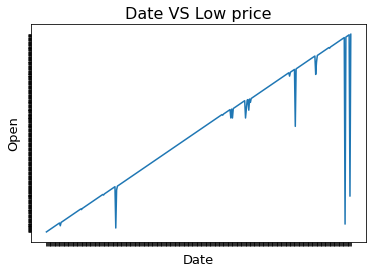

In [ ]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

plt.title("Date VS Low price", fontsize='16')
X = df.toPandas()["Date"].values.tolist()
Y = df.toPandas()["Open"].values.tolist() 
Z = df.toPandas()["Low"].values.tolist()
H = df.toPandas()["High"].values.tolist()
plt.plot(X,Y)
plt.xticks(X,labels="")
plt.yticks(Y,labels="")
# plt.plot(X,Z, 'go')
plt.xlabel("Date",fontsize='13')	#adds a label in the x axis
plt.ylabel("Open",fontsize='13')	#adds a label in the y axis

# **Bar graph of all the data**

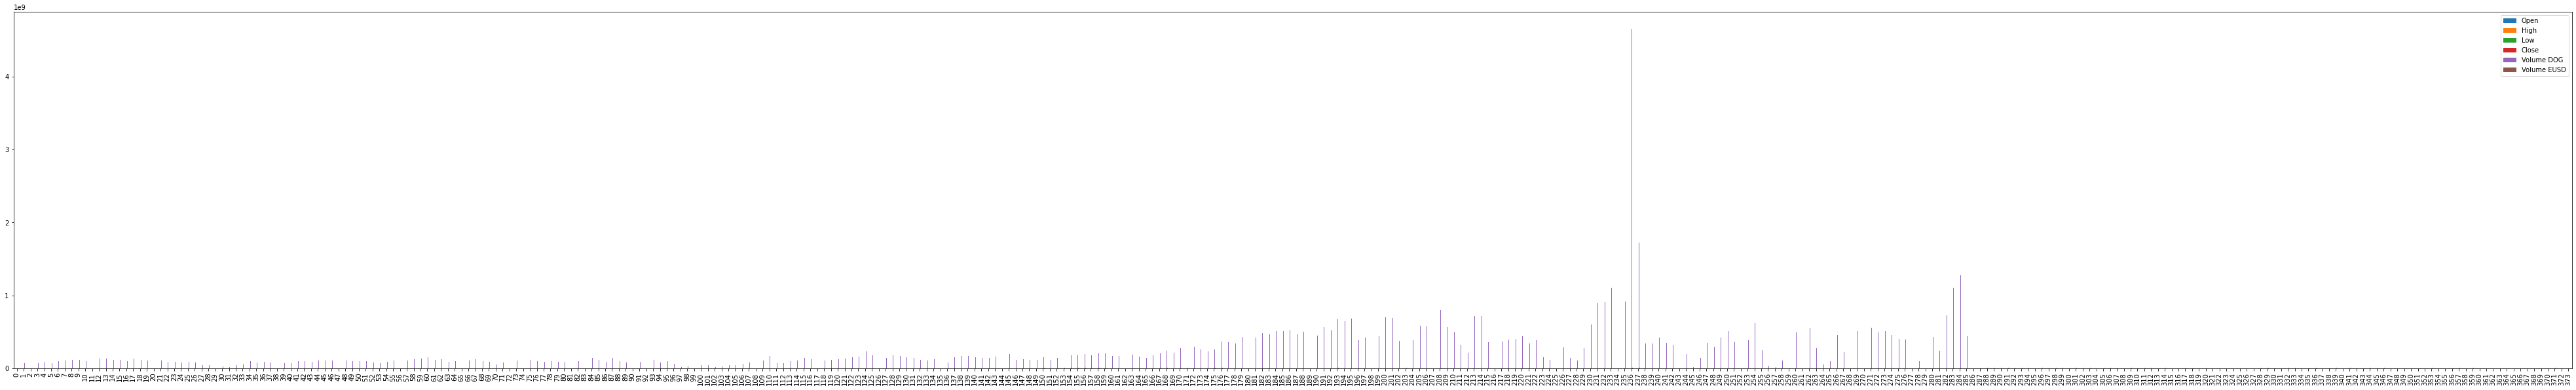

In [ ]:
df1.plot.bar(figsize=(70, 10))

Text(0.5, 1.0, 'Date VS High price')

([<matplotlib.axis.XTick at 0x7f219e5aeed0>,
 [])

([<matplotlib.axis.YTick at 0x7f21b8acc550>,
 [])

Text(0.5, 0, 'Date')

Text(0, 0.5, 'High')

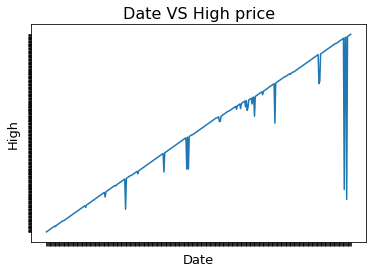

In [ ]:
Z = df.toPandas()["High"].values.tolist()
plt.title("Date VS High price", fontsize='16')
plt.plot(X,Z)
plt.xticks(X,labels="")
plt.yticks(Z,labels="")
# plt.plot(X,Z, 'go')
plt.xlabel("Date",fontsize='13')	#adds a label in the x axis
plt.ylabel("High",fontsize='13')	#adds a label in the y axis
# plt.show()

Text(0.5, 1.0, 'Date VS Openning price')

<BarContainer object of 374 artists>

([<matplotlib.axis.XTick at 0x7fcfae039d90>,
 [])

([<matplotlib.axis.YTick at 0x7fcfade87950>,
 [])

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Open')

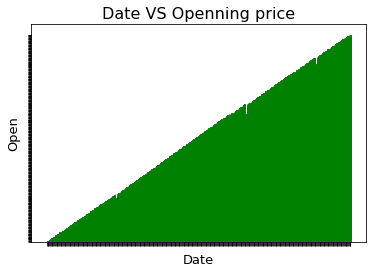

In [ ]:
plt.title("Date VS Openning price", fontsize='16')
plt.bar(X,Y,edgecolor = "Green",tick_label="Open")
plt.xticks(X,labels="")
plt.yticks(Y,labels="")
plt.xlabel("Date",fontsize='13')	#adds a label in the x axis
plt.ylabel("Open",fontsize='13')	#adds a label in the y axis
plt.show()

Text(0.5, 1.0, 'Date VS High price')

<BarContainer object of 374 artists>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'High')

([<matplotlib.axis.XTick at 0x7fcf9884a210>,
 [])

([<matplotlib.axis.YTick at 0x7fcf992b1a50>,
 [])

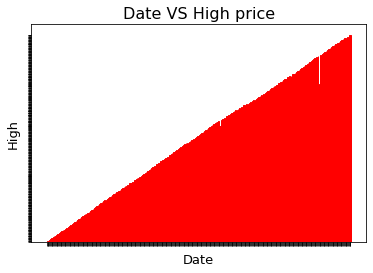

In [ ]:
plt.title("Date VS High price", fontsize='16')
plt.bar(X,H,edgecolor = "red",tick_label="High")
plt.xlabel("Date",fontsize='13')	#adds a label in the x axis
plt.ylabel("High",fontsize='13')	#adds a label in the y axis
plt.xticks(X,labels="")
plt.yticks(H,labels="")

Text(0.5, 1.0, 'Date VS Low price')

<BarContainer object of 374 artists>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'low')

([<matplotlib.axis.XTick at 0x7fcfac70a790>,
 [])

([<matplotlib.axis.YTick at 0x7fcfada7a350>,
 [])

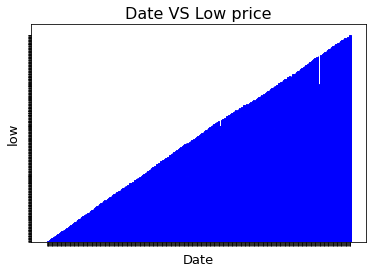

In [ ]:
plt.title("Date VS Low price", fontsize='16')
plt.bar(X,Z,edgecolor = "Blue")
plt.xlabel("Date",fontsize='13')	#adds a label in the x axis
plt.ylabel("low",fontsize='13')	#adds a label in the y axis
plt.xticks(X,labels="")
plt.yticks(Z,labels="")

Text(0.5, 1.0, 'Date VS Volume DOG')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Volume DOG')

([<matplotlib.axis.XTick at 0x7fcfac4e2650>,
 [])

([<matplotlib.axis.YTick at 0x7fcfac724310>,
 [])

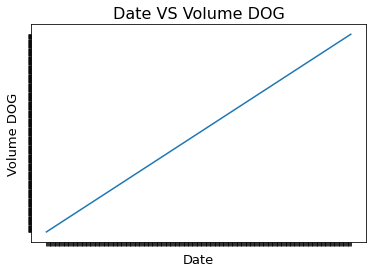

In [ ]:
plt.title("Date VS Volume DOG", fontsize='16')
Hist = df.toPandas()["Volume DOG"].values.tolist()
plt.plot(X,Hist)
plt.xlabel("Date",fontsize='13')	#adds a label in the x axis
plt.ylabel("Volume DOG",fontsize='13')	#adds a label in the y axis
plt.xticks(X,labels="")
plt.yticks(Hist,labels="")

Text(0.5, 1.0, 'Date VS Volume EUSD')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Volume EUSD')

([<matplotlib.axis.XTick at 0x7fcf9f7ac610>,
 [])

([<matplotlib.axis.YTick at 0x7fcf9d3baa10>,
 [])

TypeError: ignored

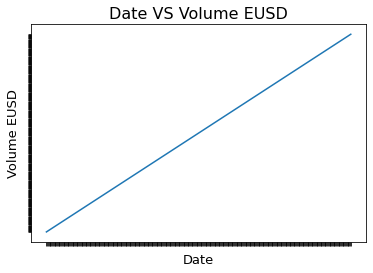

In [ ]:
plt.title("Date VS Volume EUSD", fontsize='16')
vol = df.toPandas()["Volume EUSD"].values.tolist()
plt.plot(X,vol)
plt.xlabel("Date",fontsize='13')	#adds a label in the x axis
plt.ylabel("Volume EUSD",fontsize='13')	#adds a label in the y axis
plt.xticks(X,labels="")
plt.yticks(vol,labels="")
# plt.show(figsize=(70, 10))

# **Ploting HeatMap**

In [ ]:
import seaborn as sns

In [ ]:
df1 = df.drop("Date")
df1 = df1.toPandas()[df1.columns].astype(float)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         374 non-null    float64
 1   High         374 non-null    float64
 2   Low          374 non-null    float64
 3   Close        374 non-null    float64
 4   Volume DOG   374 non-null    float64
 5   Volume EUSD  374 non-null    float64
 6   _c9          0 non-null      float64
dtypes: float64(7)
memory usage: 20.6 KB


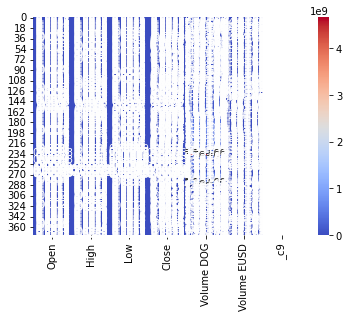

In [ ]:
sns.heatmap(df1,cmap ='coolwarm',annot = True)

##  1. Linear Regression

In [ ]:
df.show()

+----------+--------+--------+--------+--------+-----------+-----------+----+
|      Date|    Open|    High|     Low|   Close| Volume DOG|Volume EUSD| _c9|
+----------+--------+--------+--------+--------+-----------+-----------+----+
|11-06-2018|0.003102|0.003185|0.003074|0.003161|  2061200.0|     6413.4|null|
|09-06-2018|0.003656|0.003700|0.003614|0.003627| 71438190.0|   261809.2|null|
|08-06-2018|0.003726|0.003726|0.003450|0.003656| 75571620.0|   276957.4|null|
|07-06-2018|0.003743|0.003856|0.003692|0.003726| 68292630.0|   257091.0|null|
|06-06-2018|0.003641|0.003801|0.003600|0.003743| 90495280.0|   335175.7|null|
|05-06-2018|0.003556|0.003743|0.003457|0.003641| 72819600.0|   261422.0|null|
|04-06-2018|0.003661|0.003745|0.003450|0.003556| 99906580.0|   356974.7|null|
|03-06-2018|0.003576|0.003720|0.003530|0.003661|108571390.0|   395237.8|null|
|02-06-2018|0.003420|0.003798|0.003385|0.003576|116947370.0|   408815.7|null|
|01-06-2018|0.003402|0.003549|0.003191|0.003420|110272030.0|   3

In [ ]:
from pyspark.ml.feature import StringIndexer
indexer=StringIndexer(inputCols=["Open","High","Low","Close","Volume DOG"],outputCols=["Open_ind","High_ind","Low_ind","Close_ind","Volume DOG ind"])
df_r=indexer.fit(df).transform(df)
df_r.show()

+----------+--------+--------+--------+--------+-----------+-----------+----+--------+--------+-------+---------+--------------+
|      Date|    Open|    High|     Low|   Close| Volume DOG|Volume EUSD| _c9|Open_ind|High_ind|Low_ind|Close_ind|Volume DOG ind|
+----------+--------+--------+--------+--------+-----------+-----------+----+--------+--------+-------+---------+--------------+
|11-06-2018|0.003102|0.003185|0.003074|0.003161|  2061200.0|     6413.4|null|   184.0|   176.0|  204.0|    185.0|         149.0|
|09-06-2018|0.003656|0.003700|0.003614|0.003627| 71438190.0|   261809.2|null|   219.0|   206.0|  239.0|    216.0|         307.0|
|08-06-2018|0.003726|0.003726|0.003450|0.003656| 75571620.0|   276957.4|null|   226.0|   209.0|    0.0|    218.0|         317.0|
|07-06-2018|0.003743|0.003856|0.003692|0.003726| 68292630.0|   257091.0|null|   227.0|   221.0|  244.0|    225.0|         300.0|
|06-06-2018|0.003641|0.003801|0.003600|0.003743| 90495280.0|   335175.7|null|   218.0|   219.0|  

In [ ]:
from pyspark.ml.feature import VectorAssembler
featureassembler=VectorAssembler(inputCols=['Open_ind','High_ind','Low_ind','Close_ind'],outputCol="Independent Features")
output=featureassembler.transform(df_r)

In [ ]:
output.select('Independent Features').show()

+--------------------+
|Independent Features|
+--------------------+
|[184.0,176.0,204....|
|[219.0,206.0,239....|
|[226.0,209.0,0.0,...|
|[227.0,221.0,244....|
|[218.0,219.0,237....|
|[214.0,211.0,234....|
|[221.0,212.0,0.0,...|
|[14.0,208.0,236.0...|
|[204.0,217.0,228....|
|[203.0,20.0,213.0...|
|[201.0,197.0,222....|
|[13.0,20.0,220.0,...|
|[192.0,199.0,207....|
|[202.0,193.0,212....|
|[12.0,195.0,226.0...|
|[208.0,201.0,229....|
|[213.0,203.0,233....|
|[13.0,202.0,218.0...|
|[229.0,224.0,224....|
|[239.0,227.0,245....|
+--------------------+
only showing top 20 rows



In [ ]:
Final_data=output.select("Independent Features", "Volume DOG ind")
Final_data.show()

+--------------------+--------------+
|Independent Features|Volume DOG ind|
+--------------------+--------------+
|[184.0,176.0,204....|         149.0|
|[219.0,206.0,239....|         307.0|
|[226.0,209.0,0.0,...|         317.0|
|[227.0,221.0,244....|         300.0|
|[218.0,219.0,237....|         348.0|
|[214.0,211.0,234....|         312.0|
|[221.0,212.0,0.0,...|         373.0|
|[14.0,208.0,236.0...|          23.0|
|[204.0,217.0,228....|          43.0|
|[203.0,20.0,213.0...|          24.0|
|[201.0,197.0,222....|         368.0|
|[13.0,20.0,220.0,...|          36.0|
|[192.0,199.0,207....|          68.0|
|[202.0,193.0,212....|          65.0|
|[12.0,195.0,226.0...|          30.0|
|[208.0,201.0,229....|          37.0|
|[213.0,203.0,233....|         371.0|
|[13.0,202.0,218.0...|          64.0|
|[229.0,224.0,224....|          27.0|
|[239.0,227.0,245....|          20.0|
+--------------------+--------------+
only showing top 20 rows



In [ ]:
from pyspark.ml.regression import S
train_data,test_data = Final_data.randomSplit([0.60,0.40])
reg=LinearRegression(featuresCol='Independent Features',labelCol='Volume DOG ind')
reg=reg.fit(train_data)

In [ ]:
reg.coefficients

DenseVector([-0.0596, 0.1154, -0.2039, -0.0153])

In [ ]:
reg.intercept

214.35161485878385

In [ ]:
pred_results=reg.evaluate(test_data)
pred_results.predictions.show()

/content/spark-3.2.0-bin-hadoop3.2/python/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+--------------------+--------------+------------------+
|Independent Features|Volume DOG ind|        prediction|
+--------------------+--------------+------------------+
| [0.0,5.0,35.0,29.0]|         135.0| 221.6663830678334|
| [0.0,7.0,43.0,45.0]|           7.0|222.01806325211496|
|[0.0,10.0,51.0,60.0]|         280.0| 222.4512305839567|
|  [0.0,43.0,4.0,2.0]|         187.0|226.87675914377252|
| [3.0,45.0,3.0,36.0]|         268.0|227.52351087076087|
|[3.0,47.0,39.0,35.0]|         230.0| 225.7169869533952|
|[6.0,88.0,100.0,8...|         127.0|228.16791664555734|
|[7.0,106.0,117.0,...|         138.0|229.71153913054613|
|[8.0,109.0,127.0,...|         125.0|229.57706091926488|
|[9.0,161.0,165.0,...|          63.0|234.90629253068806|
|[10.0,165.0,180.0...|           3.0| 234.3634659125487|
|[10.0,190.0,175.0...|          56.0|238.37028438066966|
|[12.0,214.0,219.0...|         369.0|238.58394318913247|
|[14.0,22.0,223.0,...|          29.0|215.17923419411264|
|[14.0,208.0,236.0...|         

In [ ]:
pred_results.r2

0.01641081931493682

In [ ]:
pred_results.meanAbsoluteError

93.48502909562418

In [ ]:
pred_results.meanSquaredError

12209.02820434598

In [ ]:
df_t=df
df_t.show()

+----------+--------+--------+--------+--------+-----------+-----------+----+
|      Date|    Open|    High|     Low|   Close| Volume DOG|Volume EUSD| _c9|
+----------+--------+--------+--------+--------+-----------+-----------+----+
|11-06-2018|0.003102|0.003185|0.003074|0.003161|  2061200.0|     6413.4|null|
|09-06-2018|0.003656|0.003700|0.003614|0.003627| 71438190.0|   261809.2|null|
|08-06-2018|0.003726|0.003726|0.003450|0.003656| 75571620.0|   276957.4|null|
|07-06-2018|0.003743|0.003856|0.003692|0.003726| 68292630.0|   257091.0|null|
|06-06-2018|0.003641|0.003801|0.003600|0.003743| 90495280.0|   335175.7|null|
|05-06-2018|0.003556|0.003743|0.003457|0.003641| 72819600.0|   261422.0|null|
|04-06-2018|0.003661|0.003745|0.003450|0.003556| 99906580.0|   356974.7|null|
|03-06-2018|0.003576|0.003720|0.003530|0.003661|108571390.0|   395237.8|null|
|02-06-2018|0.003420|0.003798|0.003385|0.003576|116947370.0|   408815.7|null|
|01-06-2018|0.003402|0.003549|0.003191|0.003420|110272030.0|   3

In [ ]:
import matplotlib.pyplot as plt
import numpy as numpy
import pandas as pd
%matplotlib inline


In [ ]:
for col in df_r.columns:
    print(col)

Date
Open
High
Low
Close
Volume DOG
Volume EUSD
_c9
Open_ind
High_ind
Low_ind
Close_ind
Volume DOG ind


In [ ]:
from sklearn import preprocessing

In [ ]:
csvfile=pd.read_csv('/content/doge.csv')

In [ ]:
print(csvfile)

     Unix Timestamp        Date   Symbol  ...  Volume DOG  Volume EUSD  Unnamed: 9
0        1528675200  11-06-2018  DOGEUSD  ...   2061200.0       6413.4         NaN
1        1528502400  09-06-2018  DOGEUSD  ...  71438190.0     261809.2         NaN
2        1528416000  08-06-2018  DOGEUSD  ...  75571620.0     276957.4         NaN
3        1528329600  07-06-2018  DOGEUSD  ...  68292630.0     257091.0         NaN
4        1528243200  06-06-2018  DOGEUSD  ...  90495280.0     335175.7         NaN
..              ...         ...      ...  ...         ...          ...         ...
369      1496707200  06-06-2017  DOGEUSD  ...    604030.0       4142.2         NaN
370      1496620800  05-06-2017  DOGEUSD  ...   1378090.0       4581.5         NaN
371      1496534400  04-06-2017  DOGEUSD  ...   1703760.0       5362.0         NaN
372      1496448000  03-06-2017  DOGEUSD  ...   1248350.0       3485.3         NaN
373      1496361600  02-06-2017  DOGEUSD  ...    123520.0        356.2         NaN

[37

In [ ]:
for col in csvfile.columns:
    print(col)

Open
High
Low
Close
Volume DOG
Volume EUSD
Unnamed: 9


In [ ]:
csvfile.drop('Unnamed: 9',
  axis='columns', inplace=True)

In [ ]:
print(csvfile)

     Unix Timestamp        Date      Open  ...  Volume DOG  Volume EUSD  Unnamed: 9
0        1528675200  11-06-2018  0.003102  ...   2061200.0       6413.4         NaN
1        1528502400  09-06-2018  0.003656  ...  71438190.0     261809.2         NaN
2        1528416000  08-06-2018  0.003726  ...  75571620.0     276957.4         NaN
3        1528329600  07-06-2018  0.003743  ...  68292630.0     257091.0         NaN
4        1528243200  06-06-2018  0.003641  ...  90495280.0     335175.7         NaN
..              ...         ...       ...  ...         ...          ...         ...
369      1496707200  06-06-2017  0.003718  ...    604030.0       4142.2         NaN
370      1496620800  05-06-2017  0.003770  ...   1378090.0       4581.5         NaN
371      1496534400  04-06-2017  0.003213  ...   1703760.0       5362.0         NaN
372      1496448000  03-06-2017  0.002803  ...   1248350.0       3485.3         NaN
373      1496361600  02-06-2017  0.000100  ...    123520.0        356.2     

In [ ]:
result=preprocessing.normalize(csvfile,axis=0)

In [ ]:
print(result)

[[3.57510465e-02 1.31198591e-02 3.92147978e-02 3.63985550e-02
  2.80987382e-04 4.13774395e-04]
 [4.21359852e-02 1.52412806e-02 4.61035391e-02 4.17644920e-02
  9.73861341e-03 1.68911877e-02]
 [4.29427464e-02 1.53483815e-02 4.40114028e-02 4.20984237e-02
  1.03020918e-02 1.78685067e-02]
 ...
 [3.70303393e-02 1.55296291e-02 3.24536257e-02 4.34111207e-02
  2.32260364e-04 3.45941046e-04]
 [3.23050237e-02 1.39972626e-02 3.38696448e-02 3.69973291e-02
  1.70177857e-04 2.24861680e-04]
 [1.15251601e-03 8.23853005e-01 1.27569284e-03 3.22762258e-02
  1.68385219e-05 2.29810147e-05]]


In [ ]:
print(df1)

In [ ]:
df.show()


+----------+--------+--------+--------+--------+-----------+-----------+----+
|      Date|    Open|    High|     Low|   Close| Volume DOG|Volume EUSD| _c9|
+----------+--------+--------+--------+--------+-----------+-----------+----+
|11-06-2018|0.003102|0.003185|0.003074|0.003161|  2061200.0|     6413.4|null|
|09-06-2018|0.003656|0.003700|0.003614|0.003627| 71438190.0|   261809.2|null|
|08-06-2018|0.003726|0.003726|0.003450|0.003656| 75571620.0|   276957.4|null|
|07-06-2018|0.003743|0.003856|0.003692|0.003726| 68292630.0|   257091.0|null|
|06-06-2018|0.003641|0.003801|0.003600|0.003743| 90495280.0|   335175.7|null|
|05-06-2018|0.003556|0.003743|0.003457|0.003641| 72819600.0|   261422.0|null|
|04-06-2018|0.003661|0.003745|0.003450|0.003556| 99906580.0|   356974.7|null|
|03-06-2018|0.003576|0.003720|0.003530|0.003661|108571390.0|   395237.8|null|
|02-06-2018|0.003420|0.003798|0.003385|0.003576|116947370.0|   408815.7|null|
|01-06-2018|0.003402|0.003549|0.003191|0.003420|110272030.0|   3

###Pandas

In [ ]:
dff=pd.read_csv('/content/doge.csv')
dff.head()

In [ ]:
dff.drop('Symbol',
  axis='columns', inplace=True)

In [ ]:
dff.drop('Date',
  axis='columns', inplace=True)

In [ ]:
dff = dff.dropna(axis=1)

In [ ]:
dff.head()

In [ ]:
x=dff.drop(['Volume DOG','Unix Timestamp','Volume EUSD'],axis=1).values
y=dff['Volume DOG'].values

In [ ]:
print(x)

In [ ]:
print(y)

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=ml.predict(x_test)
print(y_pred)

[ 1.56667529e+08  2.56847598e+08  2.79039545e+08  2.81232696e+08
  2.65639775e+08  2.92110121e+07  2.79605087e+08  3.24402626e+08
  1.85741294e+08  1.07600623e+08  2.65095242e+08  2.55688741e+08
  2.20250209e+08  2.57199836e+08  2.06785006e+08  2.76802183e+08
  1.13912600e+08  3.40035391e+08  2.45145712e+08  2.42432750e+08
 -7.76949875e+07  7.89494881e+07  2.83659652e+08  3.09367452e+08
  2.61036043e+08  1.51892568e+08  2.73289681e+08  2.77049479e+08
  1.63431043e+08  1.37825494e+08  2.32412778e+08  1.36316351e+08
  1.95495997e+08  2.73468825e+08  1.15671919e+07  2.94174767e+08
  1.25359152e+08  3.35621538e+08  1.63070332e+08  1.22999948e+08
  1.74337809e+08  2.37211352e+08  2.69689324e+08  1.74217007e+10
  1.19023368e+08  1.55967681e+08  2.67895199e+08  2.49046824e+08
  1.66848235e+08  2.03804361e+08  2.80805232e+08  1.54400123e+08
  2.84453004e+08  2.38171651e+08  2.23666853e+08  2.66762818e+08
  1.40738864e+08  1.11347180e+08  1.48237700e+08  2.31806606e+07
  2.92167844e+08  2.79502

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-57.58528165825595